In [10]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from datetime import datetime as dt
import pickle
import xgboost as xgb

In [11]:
df=pd.read_csv('../dataset/updated_train1.csv')

In [12]:
#データクレンジング
def clean(df):
    df1=df.dropna()
    df1.set_index('store_id_date',drop=True,inplace=True)
    return df1

In [13]:
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [14]:
df1=clean(df)

In [17]:
#trainデータとvalidationデータに分割
X = df1.drop('visitors', axis=1).as_matrix()
y = df1['visitors']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

In [26]:
# Grid Search
#parameterの設定
params={'max_depth':[5,8,15,20], 
                'learning_rate':[0.001,0.01,0.05],
                'n_estimators':[100,1000,10000],
                'objective':['reg:linear'],
                'gamma':[0],
                'min_child_weight':[1],
                'subsample':[1],
                'min_child_weight':[1],
                'colsample_bytree':[1],
                'scale_pos_weight':[1],
                'seed':[27]
#                'eval_metric': ['rmse']
}

#モデルの設定
xgb_model=xgb.XGBRegressor()

In [27]:
#gridsearch
gs = GridSearchCV(xgb_model,params)
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 1000, 10000], 'gamma': [0], 'learning_rate': [0.001, 0.01, 0.05], 'scale_pos_weight': [1], 'min_child_weight': [1], 'subsample': [1], 'colsample_bytree': [1], 'max_depth': [5, 8, 15, 20], 'seed': [27], 'objective': ['reg:linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
#best parameterの表示
gs.best_params_

{'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'reg:linear',
 'scale_pos_weight': 1,
 'seed': 27,
 'subsample': 1}

In [29]:
#予測
y_test_pred = gs.predict(X_test)
y_train_pred= gs.predict(X_train)

In [30]:
#評価
#RMSLEで評価
print('trainのRMSLE：',rmsle(y_train,y_train_pred))
print('validationのRMSLE：',rmsle(y_test,y_test_pred))

#R2scoreで評価
print('trainのR2：',r2_score(y_train,y_train_pred))
print('validationのR2：',r2_score(y_test,y_test_pred))

trainのRMSLE： 0.25351370246521254
validationのRMSLE： 0.6047166126886131
trainのR2： 0.964015672144
validationのR2： 0.551227470219


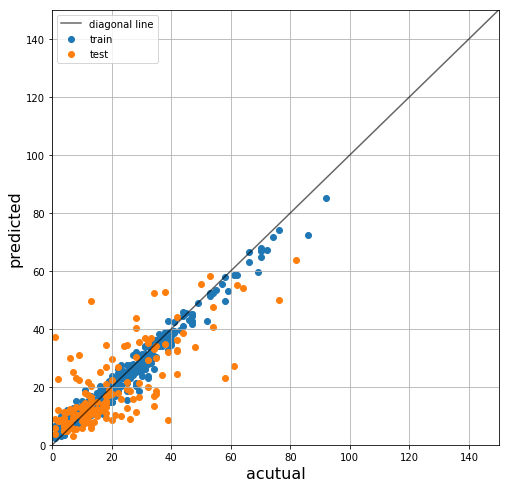

In [31]:
u_lim=150
l_lim=0
plt.figure(figsize=(8, 8))
plt.plot([l_lim,u_lim], [l_lim,u_lim], c='k', alpha=0.6, label = 'diagonal line') # diagonal line
plt.scatter(y_train,y_train_pred,label='train')
plt.scatter(y_test,y_test_pred,label='test')
plt.xlim(l_lim,u_lim)
plt.ylim(l_lim,u_lim)
plt.xlabel('acutual', fontsize=16)
plt.ylabel('predicted', fontsize=16)
plt.legend()
plt.grid()
plt.show()